<a href="https://colab.research.google.com/github/Fuenfgeld/DMA2023TeamB/blob/main/EDA_Covid_Patient_innen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ziel**: Explorative Datenanalyse (EDA) der Covid19-Patient:innen

Die explorative Datenanalyse der Covid19-Patient:innen erfolgte in vier Schritten

1. Analyse des Datensets und Exploration
2. Datenbereinigung
3. Untersuchung der Variablen
4. Untersuchung der Beziehungen zwischen den Variablen



# Import der Libraries 

In [ ]:
import pandas_profiling
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
# Zum Anlegen der Darstellungen im Google Collab Notebook 
%matplotlib inline

In [ ]:
from google.colab import drive
# Mounting des Drives zum Datenbankzugang 
drive.mount("/content/drive")

Mounted at /content/drive



# Laden der Daten 


In [ ]:
# Verbindung zur Datenbank 
DB_DWH_PATH = "/content/drive/MyDrive/Gruppe_B/DB_File/source_covid19_test.db"

# connect to db
dwh_conn = sqlite3.connect(DB_DWH_PATH)

In [ ]:
# Liste der Tabellen in Datenbank 
if dwh_conn is not None:
  dwh_cursor = dwh_conn.cursor()
  dwh_cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
  print("List of Tables", dwh_cursor.fetchall())


List of Tables [('disease',), ('patients',), ('encounters',), ('careplans',), ('conditions',), ('medications',), ('procedures',), ('observations',), ('devices',), ('imaging_studies',), ('immunizations',)]


In [ ]:
#Einlesen der SQL query Resultate in ein pandas DataFrame
# demographic data
df_patients = pd.read_sql_query("SELECT * FROM patients", dwh_conn)

df_conditions = pd.read_sql_query("SELECT * FROM conditions", dwh_conn)

In [ ]:
# Vereiniung zweier Datensätze 
df = pd.merge(df_patients, df_conditions, left_on="Id", right_on="PATIENT", how="inner")

In [ ]:
# Beenden der Datenbankverbindung
# dwh_conn.close()

# Analyse des Datensets und Exploration
In diesem Schritt werden die Daten auf ihre Struktur untersucht. Hierzu werden die folgenden Befehle aufgerufen: 
- df.head()
- df.shape
- df.columns
- df.info()
- df.describe()
- df.nunique()
- df.replace()

In [ ]:
# .head() zeigt die ersten 5 Reihen des Datensets.
df.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,2002-05-05,,999-23-8106,S99926648,,Ms.,Terisa250,Kreiger457,,...,42.472736,-70.876528,471180.0,2784.81,2020-02-20,2020-03-11,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,f6cef47b-5959-a7a4-5c13-0d860067403f,386661006,Fever (finding)
1,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,2002-05-05,,999-23-8106,S99926648,,Ms.,Terisa250,Kreiger457,,...,42.472736,-70.876528,471180.0,2784.81,2020-02-20,2020-03-11,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,f6cef47b-5959-a7a4-5c13-0d860067403f,36955009,Loss of taste (finding)
2,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,2002-05-05,,999-23-8106,S99926648,,Ms.,Terisa250,Kreiger457,,...,42.472736,-70.876528,471180.0,2784.81,2020-02-20,2020-02-20,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,f6cef47b-5959-a7a4-5c13-0d860067403f,840544004,Suspected COVID-19
3,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,2002-05-05,,999-23-8106,S99926648,,Ms.,Terisa250,Kreiger457,,...,42.472736,-70.876528,471180.0,2784.81,2020-02-20,2020-03-11,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,f6cef47b-5959-a7a4-5c13-0d860067403f,840539006,COVID-19
4,2812f4fc-6aba-0033-728b-7e569bb8adcc,1942-05-24,,999-24-5281,S99910925,X76697172X,Mr.,Romeo514,Morar593,,...,42.131465,-71.970333,1606235.0,5375.37,2020-03-03,2020-03-20,2812f4fc-6aba-0033-728b-7e569bb8adcc,9e07f1e2-f3bf-a2c6-504e-57e0568a5539,49727002,Cough (finding)


In [ ]:
# .shape zeigt die Anzahl der Reihen und Spalten 
#size of dataset
df.shape

(6375, 31)

In [ ]:
# .columns zeigt die Namen aller Spalten im Datenset. 
df.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTRY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'START',
       'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'],
      dtype='object')

In [ ]:
# Attributtypen
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6375 entries, 0 to 6374
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   6375 non-null   object 
 1   BIRTHDATE            6375 non-null   object 
 2   DEATHDATE            6375 non-null   object 
 3   SSN                  6375 non-null   object 
 4   DRIVERS              6375 non-null   object 
 5   PASSPORT             6375 non-null   object 
 6   PREFIX               6375 non-null   object 
 7   FIRST                6375 non-null   object 
 8   LAST                 6375 non-null   object 
 9   SUFFIX               6375 non-null   object 
 10  MAIDEN               6375 non-null   object 
 11  MARITAL              6375 non-null   object 
 12  RACE                 6375 non-null   object 
 13  ETHNICITY            6375 non-null   object 
 14  GENDER               6375 non-null   object 
 15  BIRTHPLACE           6375 non-null   o

The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [ ]:
# .describe zeigt Anzahl, Durchschnitt, Standartabweichung, Minimal- und Maximalwerte für numerische Variablen an.  
df.describe()

,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,CODE
count,6375.000000,6375.000000,6.375000e+03,6375.000000,6.375000e+03
mean,42.251169,-71.350119,8.063273e+05,3475.164659,7.888697e+11
std,0.302949,0.592587,5.707676e+05,2393.920497,1.018319e+13
min,41.251594,-73.301273,2.531530e+03,0.000000,2.229801e+07
25%,42.082114,-71.501729,2.541600e+05,2454.040000,5.767600e+07
50%,42.315334,-71.151908,7.514875e+05,2808.160000,2.671020e+08
75%,42.455424,-71.015124,1.356330e+06,4135.490000,8.405390e+08
max,42.879142,-69.947010,1.849960e+06,18194.610000,1.322810e+14


In [ ]:
# .nunique(axis=0) zeigt die Anzahl einzigartiger Werte jeder Spalte. 
df.nunique(axis=0)


Id                      941
BIRTHDATE               881
DEATHDATE                41
SSN                     941
DRIVERS                 794
PASSPORT                737
PREFIX                    4
FIRST                   837
LAST                    456
SUFFIX                    3
MAIDEN                  202
MARITAL                   3
RACE                      4
ETHNICITY                 2
GENDER                    2
BIRTHPLACE              265
ADDRESS                 941
CITY                    236
STATE                     1
COUNTRY                  14
ZIP                     209
LAT                     941
LON                     941
HEALTHCARE_EXPENSES     902
HEALTHCARE_COVERAGE     555
START                   259
STOP                     76
PATIENT                 941
ENCOUNTER              1267
CODE                     41
DESCRIPTION              41
dtype: int64

In [ ]:
# Erstezen von leeren Werten mit with NAN
df = df.replace(r'^\s*$', np.nan, regex=True)


#  Datenbereinigung


### Entfernung von Duplikaten


In [ ]:
print("Number of Duplicated Rows", df.duplicated(df.columns).sum())

Number of Duplicated Rows 0


In [ ]:

# Entfernung von Duplikaten unter Beibehaltung des ersten Werts. 
df.drop_duplicates(keep="first",inplace=True) 
print("Size of dataset after removing duplicated rows", df.shape)
  

Size of dataset after removing duplicated rows (6375, 31)


### Bei Belieben: Entfernen von überflüssigen Variablen 

In [ ]:
df.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTRY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'START',
       'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'],
      dtype='object')

In [ ]:
#df = df.drop(['SSN', 'PREFIX', 'ZIP', 'DRIVERS', 'PASSPORT', 'FIRST',
              #'LAST', 'BIRTHPLACE', 'ADDRESS', 'STATE', 'COUNTRY', 
              #'PATIENT', 'ENCOUNTER'], axis=1)

### Umgang mit fehlenden Daten 
Es gibt mehrere Wege mit fehlenden Daten umzugehen. 

1. Löschung der fehlenden Werte bei geringer Anzahl. 
2. Für numerische Werte können diese durch Durchschnittswerte oder Median Werte ersetzt werden. Letzteres wird umgesetzt, wenn es große Ausreißer gibt. 
3. Für kategorische Werte können fehlende Werte mit "mode" ersetzt werden, den häufigen Werten. We can see that we have various missing values in the respective columns. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.

In [ ]:
df.shape

(6375, 31)

In [ ]:
# Prozentsatz der nicht fehlenden Werte: 
df.count()/len(df) * 100

Id                     100.000000
BIRTHDATE              100.000000
DEATHDATE                7.576471
SSN                    100.000000
DRIVERS                 85.819608
PASSPORT                80.345098
PREFIX                  82.964706
FIRST                  100.000000
LAST                   100.000000
SUFFIX                   0.815686
MAIDEN                  28.439216
MARITAL                 69.490196
RACE                   100.000000
ETHNICITY              100.000000
GENDER                 100.000000
BIRTHPLACE             100.000000
ADDRESS                100.000000
CITY                   100.000000
STATE                  100.000000
COUNTRY                100.000000
ZIP                     52.752941
LAT                    100.000000
LON                    100.000000
HEALTHCARE_EXPENSES    100.000000
HEALTHCARE_COVERAGE    100.000000
START                  100.000000
STOP                    85.866667
PATIENT                100.000000
ENCOUNTER              100.000000
CODE          

In [ ]:
# Anzahl der Null-Werte jeder Spalte: 
df.isnull().sum()

Id                        0
BIRTHDATE                 0
DEATHDATE              5892
SSN                       0
DRIVERS                 904
PASSPORT               1253
PREFIX                 1086
FIRST                     0
LAST                      0
SUFFIX                 6323
MAIDEN                 4562
MARITAL                1945
RACE                      0
ETHNICITY                 0
GENDER                    0
BIRTHPLACE                0
ADDRESS                   0
CITY                      0
STATE                     0
COUNTRY                   0
ZIP                    3012
LAT                       0
LON                       0
HEALTHCARE_EXPENSES       0
HEALTHCARE_COVERAGE       0
START                     0
STOP                    901
PATIENT                   0
ENCOUNTER                 0
CODE                      0
DESCRIPTION               0
dtype: int64

In [ ]:
# Auffüllen der Nullwerte mit dem heutigem Datum
df["DEATHDATE"] = df.DEATHDATE.fillna(pd.to_datetime("today"))
df["STOP"] = df.STOP.fillna(pd.to_datetime("today"))

In [ ]:
# Auffüllen der Nullwerte mit "mode"
df['MARITAL'].fillna(df['MARITAL'].mode()[0], inplace=True)

In [ ]:
# Konvertierung zu "date"
df["DEATHDATE"] = pd.to_datetime(df["DEATHDATE"])
df["BIRTHDATE"] = pd.to_datetime(df["BIRTHDATE"])
df["START"] = pd.to_datetime(df["START"])
df["STOP"] = pd.to_datetime(df["STOP"])

In [ ]:
# Berechnung des Alters und Dauer 
df["AGE"] = df.DEATHDATE.dt.year - df.BIRTHDATE.dt.year
df["DURATION"] = df.STOP.dt.to_period("M").astype(int) - df.START.dt.to_period("M").astype(int)
df.DURATION

<ipython-input-27-05447808e567>:4: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df["DURATION"] = df.STOP.dt.to_period("M").astype(int) - df.START.dt.to_period("M").astype(int)


0         1
1         1
2         0
3         1
4         0
       ... 
6370     35
6371     35
6372     35
6373    377
6374     75
Name: DURATION, Length: 6375, dtype: int64

In [ ]:
# Kontrolle: Anzahl Null-Werte jeder Spalte: 
df.isnull().sum()

Id                        0
BIRTHDATE                 0
DEATHDATE                 0
SSN                       0
DRIVERS                 904
PASSPORT               1253
PREFIX                 1086
FIRST                     0
LAST                      0
SUFFIX                 6323
MAIDEN                 4562
MARITAL                   0
RACE                      0
ETHNICITY                 0
GENDER                    0
BIRTHPLACE                0
ADDRESS                   0
CITY                      0
STATE                     0
COUNTRY                   0
ZIP                    3012
LAT                       0
LON                       0
HEALTHCARE_EXPENSES       0
HEALTHCARE_COVERAGE       0
START                     0
STOP                      0
PATIENT                   0
ENCOUNTER                 0
CODE                      0
DESCRIPTION               0
AGE                       0
DURATION                  0
dtype: int64

# Univariate Analyse

## Gruppierung

In [ ]:
# Gruppierung der Patient:innen für "Id"
df.groupby(["Id"]).size()

Id
0033cec2-67d3-39ec-b0f4-29f91a2918d6     4
00680fcd-0ef2-99c5-f69d-59463206750f    15
00f4a426-4746-6513-1775-1e8650e2f6b5     5
00f8ffa0-e135-059c-32e9-54a79b5f612e     7
00ff2a47-af82-8681-cb1d-428471df02f0    10
                                        ..
ff1a2c6d-6ae4-1737-ff36-4e76782efe6c     5
ff2d586c-f770-a795-c9eb-0b0d39447e48     5
ff9e749b-0abc-22f8-0d62-6912b87781b1     6
ffd905f3-45fb-b2a7-7429-bf864ef29d81    11
ffe52b9f-cdf1-d315-9286-e64d370edde4     5
Length: 941, dtype: int64

In [ ]:
df.groupby(["Id", "CODE"]).size()

Id                                    CODE     
0033cec2-67d3-39ec-b0f4-29f91a2918d6  49727002     1
                                      386661006    1
                                      840539006    1
                                      840544004    1
00680fcd-0ef2-99c5-f69d-59463206750f  25064002     1
                                                  ..
ffe52b9f-cdf1-d315-9286-e64d370edde4  25064002     1
                                      36955009     1
                                      49727002     1
                                      386661006    1
                                      840544004    1
Length: 6375, dtype: int64

## Histogramme



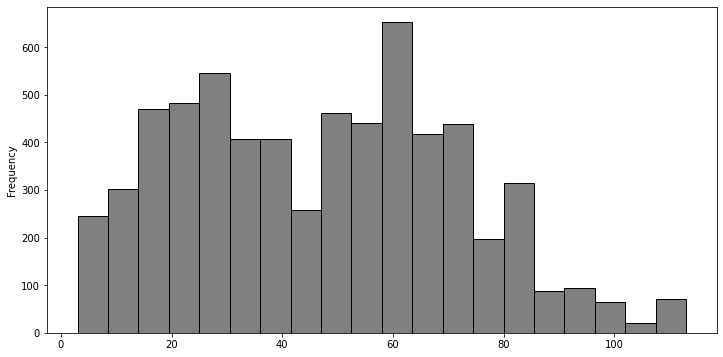

In [ ]:
#Alterverteilung der Patient:innen
df['AGE'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')


## Boxplot und Entfernung der Ausreißer 


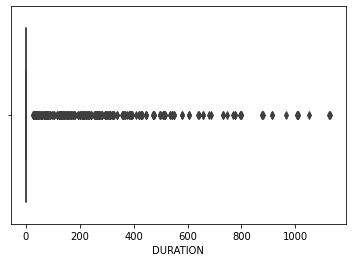

In [ ]:
sns.boxplot(x=df["DURATION"])

In [ ]:
df = df[df["DURATION"]<1200]
df.shape

(6375, 33)

## Countplot

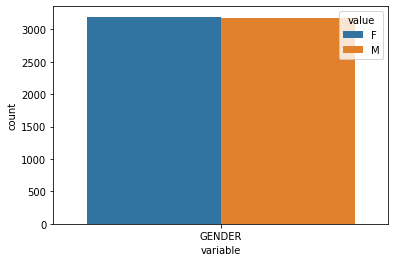

In [ ]:
# Verteilung der Geschlechter 
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["GENDER"]]))

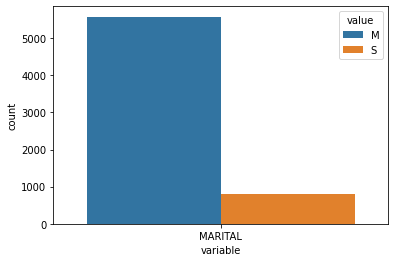

In [ ]:
# Verteilung des Marital Status
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["MARITAL"]]))

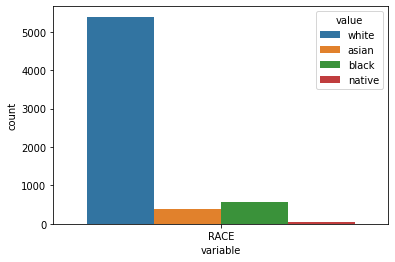

In [ ]:
# Verteilung des "Race"-Attributs 
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["RACE"]]))

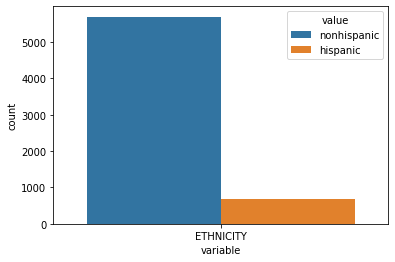

In [ ]:
# Verteilung des "Race"-Attributs 
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["ETHNICITY"]]))

In [ ]:
# Konvertierung von kategorischden Variablen zu numerischen Variablen 
df.GENDER.replace(['M', 'F'], [0, 1], inplace=True)
df.MARITAL.replace(['M', 'S'], [0, 1], inplace=True)
df.RACE.replace(["white", "black", "asian"], [1, 2, 3], inplace=True)
df.ETHNICITY.replace(["nonhispanic", "hispanic"], [0, 1], inplace=True)

#  Multivariate Analyse: Analyse der Beziehungen zwischen Variablen 

Korrelationmatrix und Scatterplots sind nützliche Werkzeuge, um die Beziehung zwischen den Variablen darzustellen. 

### Correlation Matrix


In [ ]:
# Liste der Spalten
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6375 entries, 0 to 6374
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   6375 non-null   object        
 1   BIRTHDATE            6375 non-null   datetime64[ns]
 2   DEATHDATE            6375 non-null   datetime64[ns]
 3   SSN                  6375 non-null   object        
 4   DRIVERS              5471 non-null   object        
 5   PASSPORT             5122 non-null   object        
 6   PREFIX               5289 non-null   object        
 7   FIRST                6375 non-null   object        
 8   LAST                 6375 non-null   object        
 9   SUFFIX               52 non-null     object        
 10  MAIDEN               1813 non-null   object        
 11  MARITAL              6375 non-null   int64         
 12  RACE                 6375 non-null   object        
 13  ETHNICITY            6375 non-nul

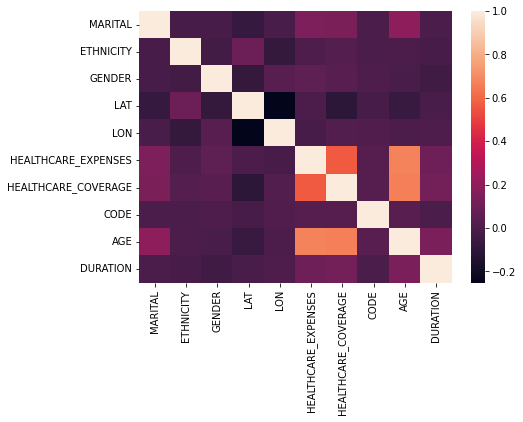

In [ ]:
# Generierung der Korrelationsmatrix 
corr = df.corr()

plt.figure(figsize=(7, 5))
# Heatmap 
sns.heatmap(corr, annot=False)

In [ ]:
# df subset numerischer Varialen
numdf = df.select_dtypes(include=np.number)
# df subset kategorischer Variablen
catdf = df.select_dtypes(exclude=np.number)
numdf.shape, catdf.shape

((6375, 10), (6375, 23))

In [ ]:
# Selektieren eines Thresholds
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False

selected_columns = numdf.columns[columns]
selected_columns

Index(['MARITAL', 'ETHNICITY', 'GENDER', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'CODE', 'AGE', 'DURATION'],
      dtype='object')

*Basierend auf dem Heatmap gibt eine Korrelation zwischen Alter und Gesundheitsausgaben, diese ist allerdings geringer als das gesetzte Threshold von 0.7 


### Scatterplot


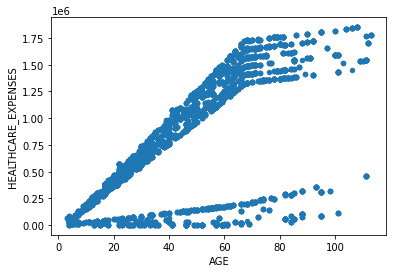

In [ ]:
df.plot(kind='scatter', y='HEALTHCARE_EXPENSES', x='AGE')


In [ ]:
df = df[(df["AGE"]<100)]

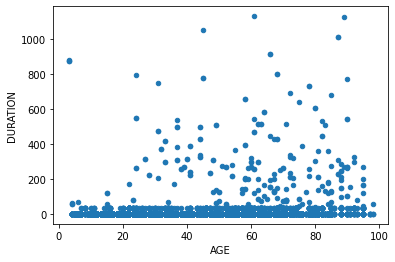

In [ ]:
df.plot(kind='scatter', y='DURATION', x='AGE')


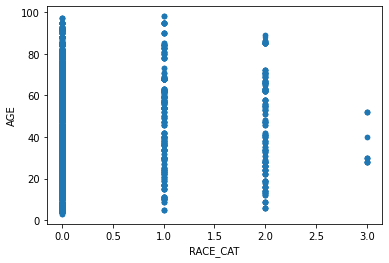

In [ ]:
df['RACE'] = df['RACE'].astype('category')
df['RACE_CAT'] = df['RACE'].cat.codes
df.plot(kind='scatter', y='AGE', x='RACE_CAT')

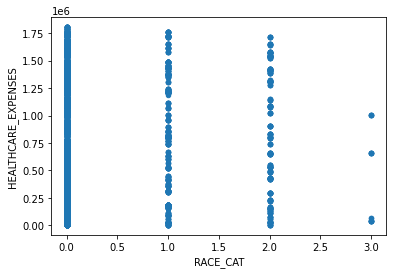

In [ ]:
df['RACE'] = df['RACE'].astype('category')
df['RACE_CAT'] = df['RACE'].cat.codes
df.plot(kind='scatter', y='HEALTHCARE_EXPENSES', x='RACE_CAT')

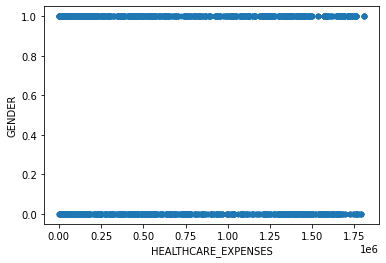

In [ ]:
df.plot(kind='scatter', x='HEALTHCARE_EXPENSES', y='GENDER')


### PCA
Die PCA (Principal Component Analysis) wird verwendet, um komplexe, hochdimensionalen Datensätze zu reduzieren und dabei wichtige Merkmale zu extrahieren. 

In [ ]:
# Auswahl der für die PCA Analyse relevanten Merkmale
df_selected = df[[ "MARITAL", "RACE", "ETHNICITY", "GENDER", "AGE", 'DURATION', 'CODE', "HEALTHCARE_EXPENSES", 'HEALTHCARE_COVERAGE']]

In [ ]:
x = x[~pd.isna(x).any(axis=1)]

In [ ]:
print(df_selected.dtypes)


MARITAL                   int64
RACE                   category
ETHNICITY                 int64
GENDER                    int64
AGE                       int64
DURATION                  int64
CODE                      int64
HEALTHCARE_EXPENSES     float64
HEALTHCARE_COVERAGE     float64
dtype: object


In [ ]:
#Umformung der kategorialen Merkmale in einen One-Hot-Encoding-Format zur Nutzung der PCA Analyse
x = pd.get_dummies(df_selected[['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'AGE', 'DURATION', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']])


In [ ]:
#Normalisierung der Daten
x = StandardScaler().fit_transform(x)


In [ ]:
y = df_selected.loc[:,['CODE']].values


In [ ]:
# Kontrolle der Normalisierung
x.shape, np.mean(x), np.std(x)

((6229, 11), -5.8072057681176915e-18, 1.0)

In [ ]:
from sklearn.decomposition import PCA

# Erstellung eines PCA Modells mit zwei Hauptkomponenten
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df_selected[['CODE']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,CODE
0,-1.206565,-0.424030,386661006.0
1,-1.206565,-0.424030,36955009.0
2,-1.208080,-0.423300,840544004.0
3,-1.206565,-0.424030,840539006.0
4,1.959499,-0.930429,49727002.0


In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.21162219 0.1741199 ]


From the above output, you can observe that the principal component 1 holds 31.6% of the information while the principal component 2 holds only 18% of the information. Also, the other point to note is that while projecting  data to a two-dimensional data, 50% information was lost.

In [ ]:
df_selected.CODE

0       386661006
1        36955009
2       840544004
3       840539006
4        49727002
          ...    
6348    840539006
6349     53741008
6350    386661006
6351    840544004
6352    840539006
Name: CODE, Length: 6229, dtype: int64

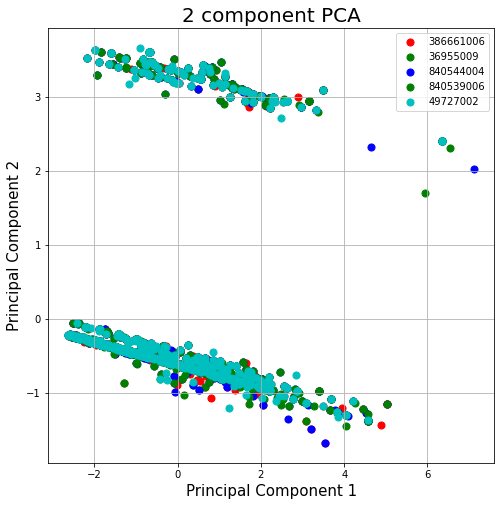

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['MARITAL', 'RACE', 'ETHNICITY''GENDER', 'AGE']
targets = [386661006,49727002, 389087006, 770349000, 840539006]
colors = ['r', 'g', 'b', 'g', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CODE'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Referenzlinks
https://chrisalbon.com/python/basics/strings_to_datetime/

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

 EDA: 
 
 https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

 https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

 https://www.analyticssteps.com/blogs/how-do-exploratory-data-analysis-building-machine-learning-models


 https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/


 PCA

 https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60